<a href="https://colab.research.google.com/github/ridlofebrio/PCVK_GANJIL_2024/blob/main/PCVK_Modul6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import glob
from skimage import io

### Input Image

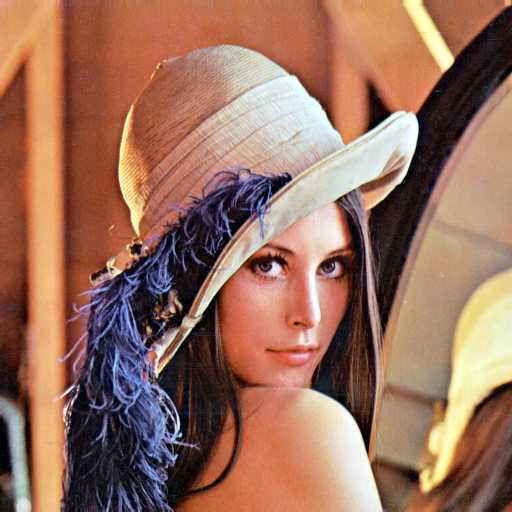

In [ ]:
img = cv.imread('/content/drive/MyDrive/image/lena.jpg')
img_color = cv.cvtColor(img,cv.COLOR_BGR2RGB)
cv2_imshow(img)


### Menghitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra yang ada

In [ ]:
unique_colors, counts = np.unique(img.reshape(-1, img.shape[-1]), axis=0, return_counts=True)

# Menampilkan hasil
print("Jumlah warna unik:", len(unique_colors))
print("Contoh warna unik dan jumlah kemunculannya:")
for color, count in zip(unique_colors, counts):
    print(f"Warna: {color}, Jumlah kemunculan: {count}")

Output streaming akan dipotong hingga 5000 baris terakhir.
Warna: [213 221 238], Jumlah kemunculan: 1
Warna: [213 222 209], Jumlah kemunculan: 1
Warna: [213 222 219], Jumlah kemunculan: 3
Warna: [213 222 225], Jumlah kemunculan: 3
Warna: [213 222 226], Jumlah kemunculan: 4
Warna: [213 222 231], Jumlah kemunculan: 3
Warna: [213 222 232], Jumlah kemunculan: 1
Warna: [213 222 235], Jumlah kemunculan: 1
Warna: [213 222 242], Jumlah kemunculan: 1
Warna: [213 223 206], Jumlah kemunculan: 1
Warna: [213 223 210], Jumlah kemunculan: 1
Warna: [213 223 211], Jumlah kemunculan: 1
Warna: [213 223 217], Jumlah kemunculan: 2
Warna: [213 223 223], Jumlah kemunculan: 3
Warna: [213 223 230], Jumlah kemunculan: 6
Warna: [213 223 240], Jumlah kemunculan: 1
Warna: [213 224 214], Jumlah kemunculan: 4
Warna: [213 224 216], Jumlah kemunculan: 1
Warna: [213 224 221], Jumlah kemunculan: 3
Warna: [213 224 222], Jumlah kemunculan: 2
Warna: [213 224 228], Jumlah kemunculan: 2
Warna: [213 224 232], Jumlah kemuncula

### Membuat histogram dengan sumbu x adalah intensitas warna dan sumbu y jumlah kemunculan

In [ ]:
b, g, r = cv.split(img)

hist_b = cv.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv.calcHist([r], [0], None, [256], [0, 256])


### Histogram Citra

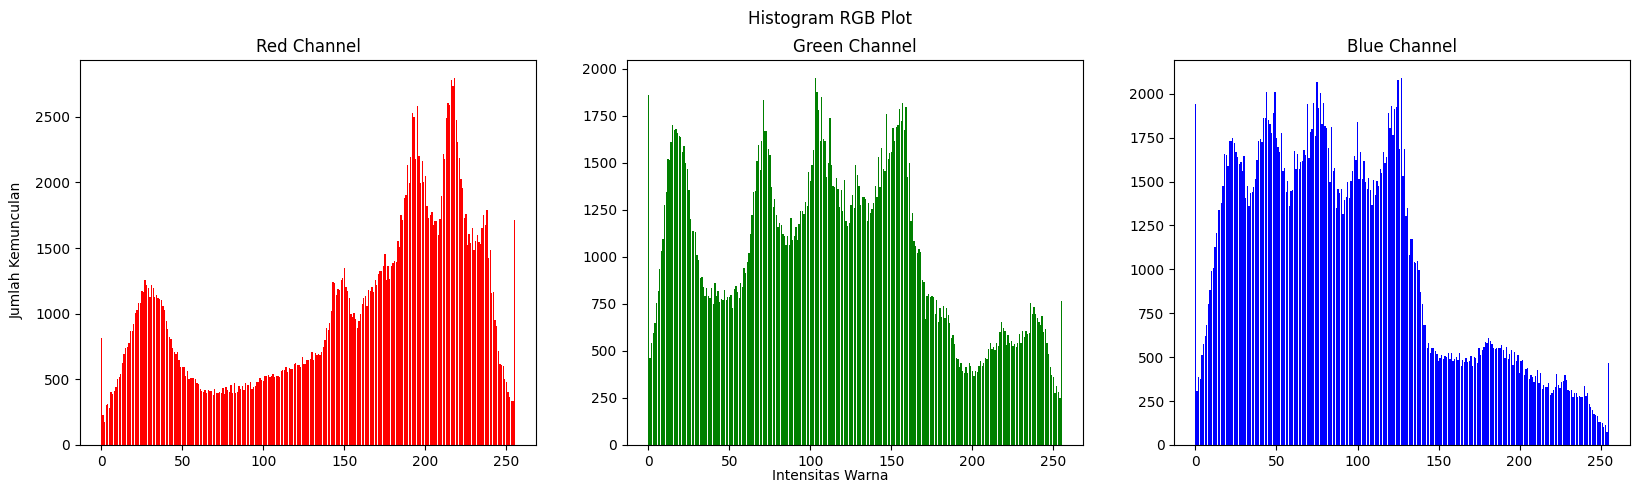

In [ ]:
names = np.arange(256)  # Nilai intensitas dari 0 hingga 255

# Membuat subplots dengan 3 plot (Red, Green, Blue)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[20, 5])
fig.suptitle('Histogram RGB Plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Membuat bar plot untuk setiap channel warna
ax1.bar(names,  hist_r.flatten(), color='red')
ax1.set_title('Red Channel')

ax2.bar(names, hist_g.flatten(), color='green')
ax2.set_title('Green Channel')

ax3.bar(names, hist_b.flatten(), color='blue')
ax3.set_title('Blue Channel')

# Menampilkan hasil
plt.show()

3. buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

jawaban : Sama

In [ ]:
hist_r, bin_edges_r = np.histogram(r, bins=256, range=(0, 256))
hist_g, bin_edges_g = np.histogram(g, bins=256, range=(0, 256))
hist_b, bin_edges_b = np.histogram(b, bins=256, range=(0, 256))

In [ ]:
nilai_histo = [hist_b, hist_g, hist_r]
names = np.arange(256)

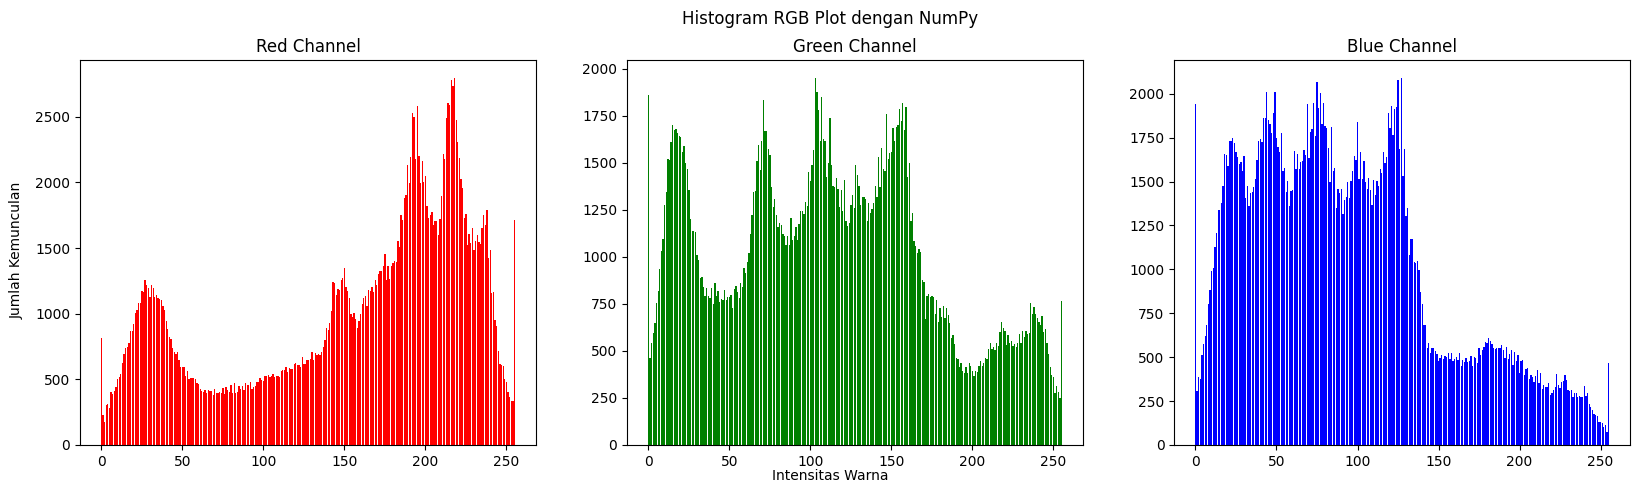

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[20, 5])
fig.suptitle('Histogram RGB Plot dengan NumPy')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Membuat bar plot untuk setiap channel warna
ax1.bar(names, nilai_histo[2], color='red')
ax1.set_title('Red Channel')

ax2.bar(names, nilai_histo[1], color='green')
ax2.set_title('Green Channel')

ax3.bar(names, nilai_histo[0], color='blue')
ax3.set_title('Blue Channel')

# Menampilkan hasil
plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

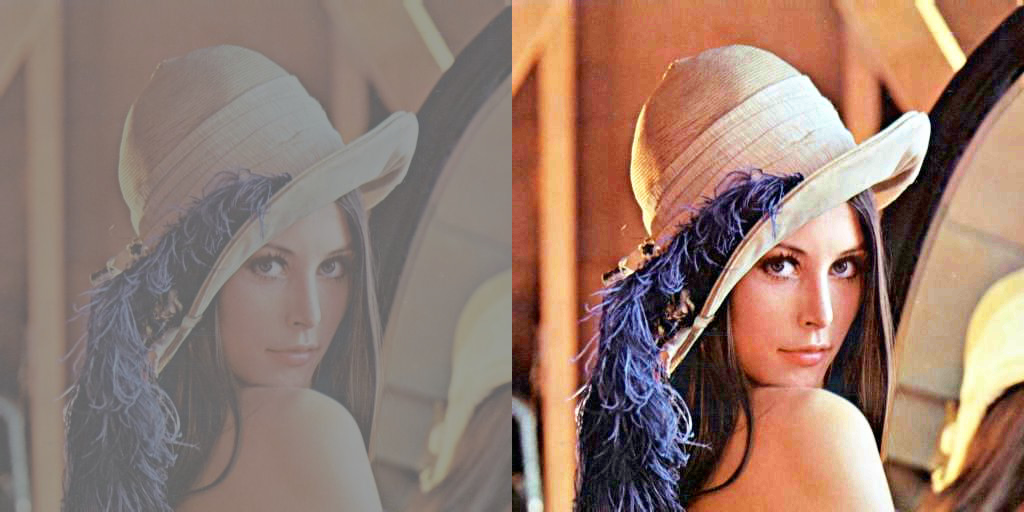

<BarContainer object of 256 artists>

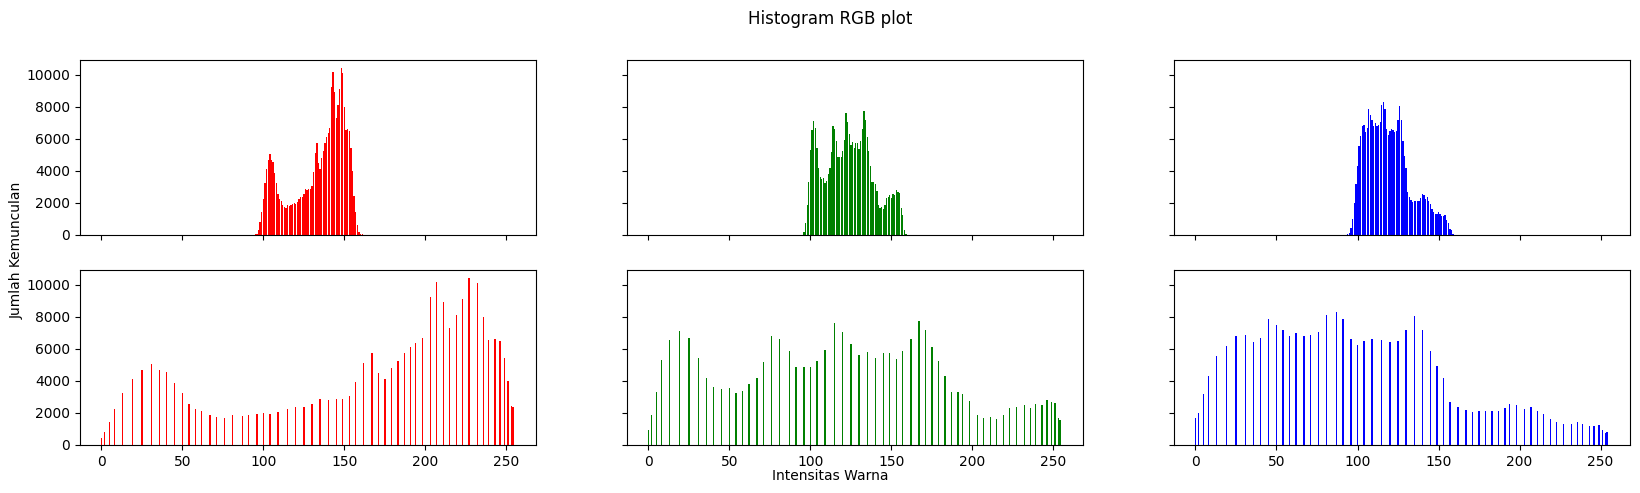

In [ ]:
img1 = cv.imread('/content/drive/MyDrive/image/lena_lc.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0,0].bar(names, histo_asli[2], color='red')
axs[0,1].bar(names, histo_asli[1], color='green')
axs[0,2].bar(names, histo_asli[0], color='blue')
axs[1,0].bar(names, equal_histo[2], color='red')
axs[1,1].bar(names, equal_histo[1], color='green')
axs[1,2].bar(names, equal_histo[0], color='blue')


6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

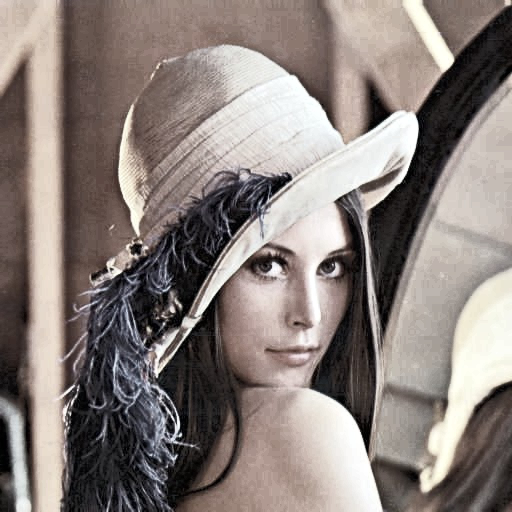

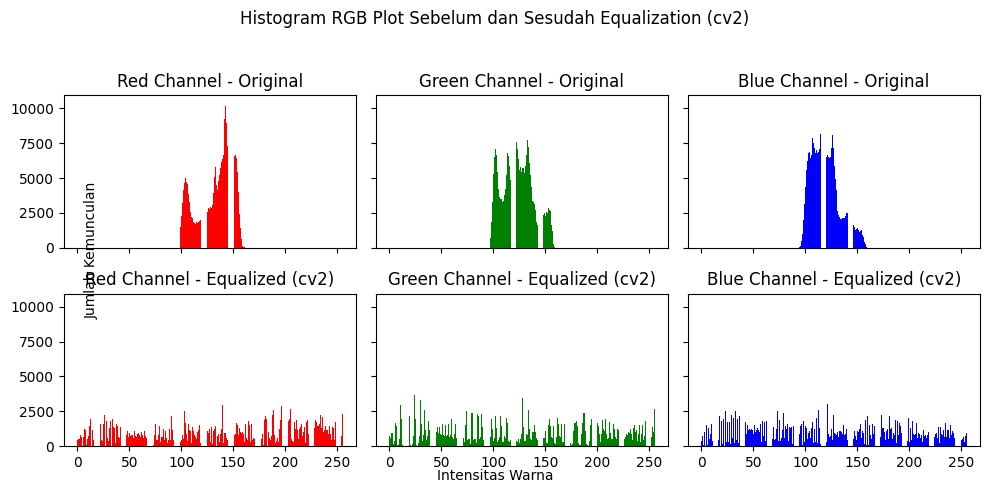

In [ ]:
# Membaca gambar input
img1 = cv.imread('/content/drive/MyDrive/image/lena_lc.jpg')


# Fungsi untuk menghitung histogram RGB
def histog(img):
    height, width, depth = np.shape(img)
    ax = np.zeros((3, 256))  # Array untuk menyimpan histogram RGB
    for y in range(height):
        for x in range(width):
            ax[0][img[y][x][0]] += 1  # Histogram untuk Blue
            ax[1][img[y][x][1]] += 1  # Histogram untuk Green
            ax[2][img[y][x][2]] += 1  # Histogram untuk Red
    return ax

# Menghitung histogram asli dari gambar img1
histo_asli = histog(img1)

# Menggunakan cv2.equalizeHist() untuk melakukan histogram equalization pada setiap channel
# Convert gambar ke YCrCb (untuk melakukan equalization pada channel luminance)
img_yuv = cv.cvtColor(img1, cv.COLOR_BGR2YCrCb)

# Equalisasi hanya pada channel Y (Luminance)
img_yuv[:, :, 0] = cv.equalizeHist(img_yuv[:, :, 0])

# Convert kembali dari YCrCb ke RGB
img_equalized_cv2 = cv.cvtColor(img_yuv, cv.COLOR_YCrCb2BGR)

# Menghitung histogram setelah equalization menggunakan cv2
equal_histo_cv2 = histog(img_equalized_cv2)

# Menampilkan gambar hasil equalization menggunakan OpenCV
cv2_imshow(img_equalized_cv2)

# Membuat subplots untuk menampilkan histogram RGB asli dan hasil equalization dengan cv2
names = np.arange(256)
fig, axs = plt.subplots(2, 3, figsize=[10, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot Sebelum dan Sesudah Equalization (cv2)')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# Histogram RGB gambar asli
axs[0, 0].bar(names, histo_asli[2], color='red')
axs[0, 0].set_title('Red Channel - Original')

axs[0, 1].bar(names, histo_asli[1], color='green')
axs[0, 1].set_title('Green Channel - Original')

axs[0, 2].bar(names, histo_asli[0], color='blue')
axs[0, 2].set_title('Blue Channel - Original')

# Histogram RGB gambar setelah equalization dengan cv2
axs[1, 0].bar(names, equal_histo_cv2[2], color='red')
axs[1, 0].set_title('Red Channel - Equalized (cv2)')

axs[1, 1].bar(names, equal_histo_cv2[1], color='green')
axs[1, 1].set_title('Green Channel - Equalized (cv2)')

axs[1, 2].bar(names, equal_histo_cv2[0], color='blue')
axs[1, 2].set_title('Blue Channel - Equalized (cv2)')

# Menampilkan hasil
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Mengatur layout agar judul tidak bertabrakan
plt.show()


Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

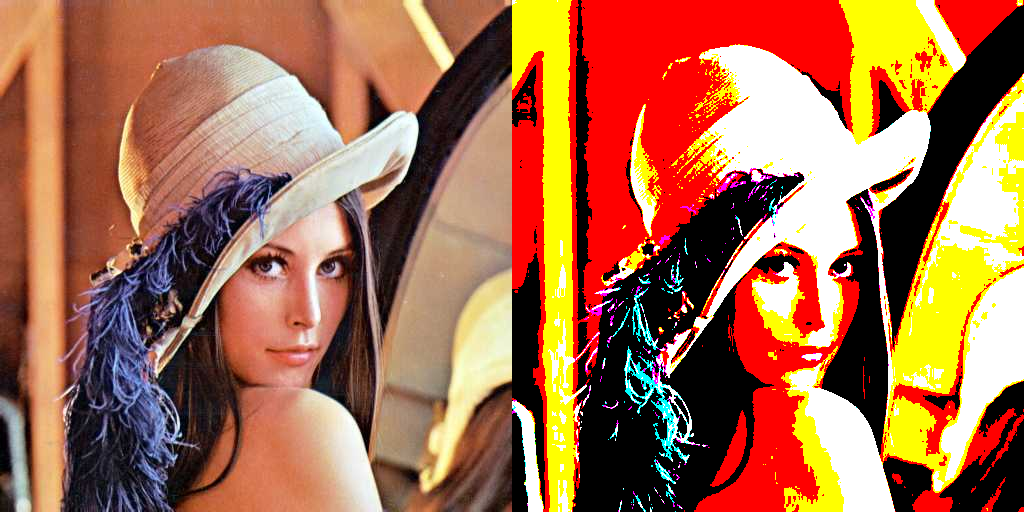

In [ ]:
img = cv.imread('/content/drive/MyDrive/image/lena.jpg')

# Definisikan 8 warna dasar dalam RGB
colors = {
    'Hitam': np.array([0, 0, 0]),
    'Hijau': np.array([0, 255, 0]),
    'Kuning': np.array([255, 255, 0]),
    'Biru': np.array([0, 0, 255]),
    'Cyan': np.array([0, 255, 255]),
    'Magenta': np.array([255, 0, 255]),
    'Putih': np.array([255, 255, 255])
}

# Menghitung jarak Euclidean antara dua warna
def euclidean_distance(color1, color2):
    return np.sqrt(np.sum((color1 - color2) ** 2))

# Buat fungsi untuk melakukan pemetaan warna
def map_to_nearest_color(image, color_dict):
    height, width, _ = image.shape
    new_image = np.zeros_like(image)  # Buat gambar baru dengan ukuran yang sama

    for y in range(height):
        for x in range(width):
            pixel = image[y, x]
            # Cari warna terdekat dari color_dict
            nearest_color = min(color_dict.keys(), key=lambda c: euclidean_distance(pixel, color_dict[c]))
            new_image[y, x] = color_dict[nearest_color]

    return new_image

# Melakukan pemetaan warna pada gambar lena
mapped_img = map_to_nearest_color(img, colors)

# Menampilkan gambar asli dan hasil pemetaan warna
final_frame = cv.hconcat((img, mapped_img))
cv2_imshow(final_frame)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)


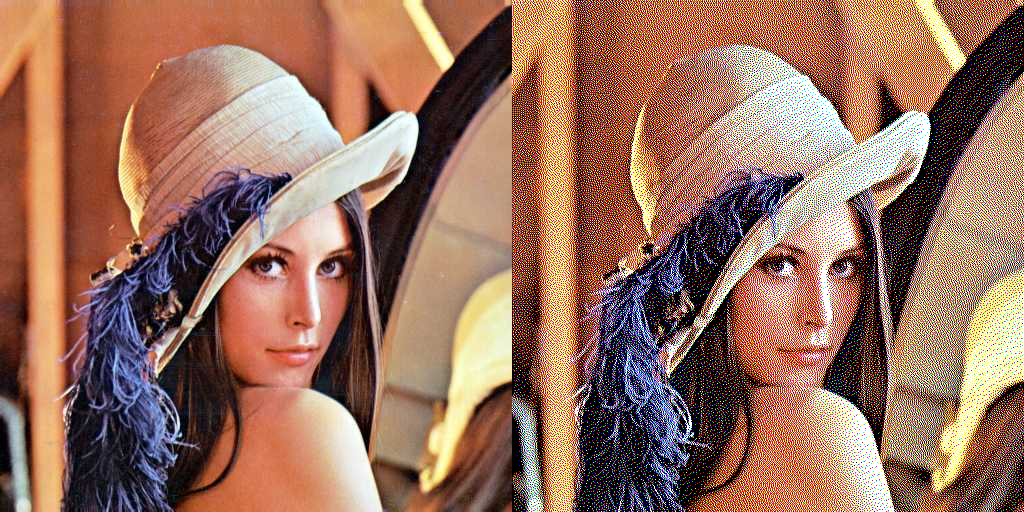

In [2]:
img = cv.imread('/content/drive/MyDrive/image/lena.jpg')
# Konversi ke tipe float
img_float = np.float64(img)

# Ukuran gambar
height, width, channels = img.shape

# Proses dithering Floyd and Steinberg pada setiap saluran warna
for y in range(height):
    for x in range(width):
        for c in range(channels):  # Loop untuk setiap saluran warna (R, G, B)
            old_value = img_float[y, x, c]
            new_value = round(old_value / 255) * 255
            img_float[y, x, c] = new_value

            error = old_value - new_value

            if x < width - 1:
                img_float[y, x + 1, c] += error * 7 / 16
            if y < height - 1:
                if x > 0:
                    img_float[y + 1, x - 1, c] += error * 3 / 16
                img_float[y + 1, x, c] += error * 5 / 16
                if x < width - 1:
                    img_float[y + 1, x + 1, c] += error * 1 / 16

# Konversi kembali ke tipe uint8
output_img = np.uint8(img_float)

# Menampilkan gambar awal dan hasil dithering
final_frame = cv.hconcat((img, output_img))
cv2_imshow(final_frame)


9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!


<ipython-input-8-e64f57e9c87f>:16: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 550 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  dithered_image[y, x] = new_pixel


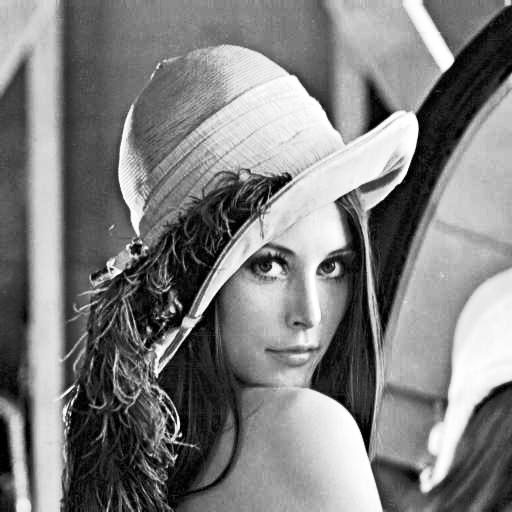

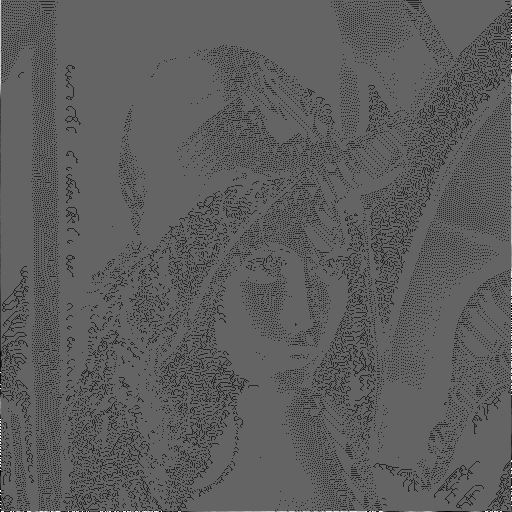

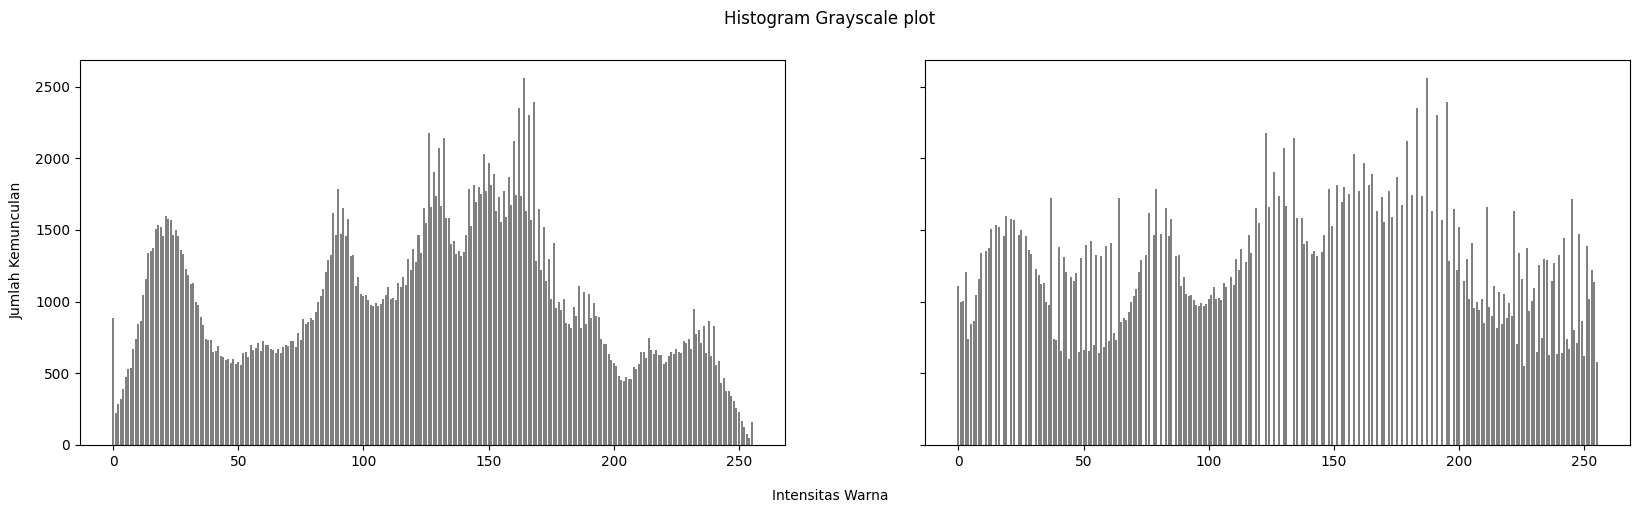

In [8]:
image = cv.imread('/content/drive/MyDrive/image/lena.jpg', cv.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_image = cv.equalizeHist(image)

# Implementasikan proses dithering Floyd-Steinberg
height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

threshold = 230

for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 100
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 3 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')


cv2_imshow(equalized_image)
cv2_imshow(dithered_image)